In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plot

#SEMİH ENGİN 191180037

In [2]:
df_titanic = pd.read_csv("train.csv")
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Q1 Information about the first 6 passengers

In [3]:
df_titanic.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


# Q2 Column titles

In [4]:
df_titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Q3 Size of dataset (passengers only).

In [5]:
print(df_titanic.PassengerId.isnull().sum())
df_titanic.PassengerId.size

0


891

#### First of all, I looked to see if there was any empty data on the number of passengers. Then when I saw that there was no empty data, I got the number of passengers.

# Q4 Check how many missing values there are in the dataset for the columns “Age”,“Cabin” and “Embarked”

In [6]:
print("Empty Age value :",df_titanic.Age.isnull().sum())
print("Empty Embarked value :",df_titanic.Embarked.isnull().sum())
print("Empty Cabin value :",df_titanic.Cabin.isnull().sum())

Empty Age value : 177
Empty Embarked value : 2
Empty Cabin value : 687


#### For age column title, 177 data is empty, for Cabin column title 2 data is empty, for Embarked ttitle 687 data is empty

# Q5 Create a pie chart that shows the percentage of passengers that embarked from each port (Southampton, Cherbourg, Queenstown)

<AxesSubplot: ylabel='Embarked'>

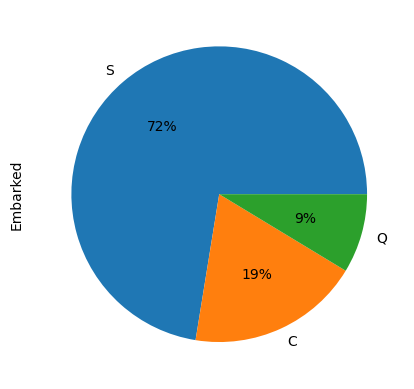

In [7]:
df_titanic.Embarked.value_counts().plot(kind = 'pie', autopct = "%1.f%%")

#### Most people embracked from port "S" (Southampton) with 72%, and people embracked from port "Q" (Queenstown) with the least 9%

# Q6 Create a bar chart that shows the number of passengers traveling for each class

<AxesSubplot: >

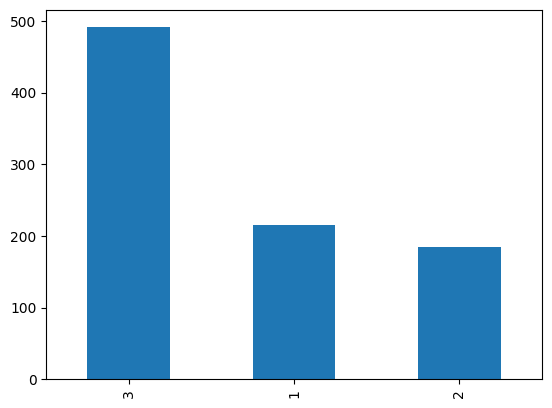

In [8]:
df_titanic['Pclass'].value_counts().plot.bar()

### As can be seen from the bar graph, the maximum number of passengers is the number of passengers in the 3rd class, and there are almost 500 passengers.

# Q7 Create a plot that shows the number of female passengers for each ticket class who survived and who did not survive in bar chart format.

<AxesSubplot: >

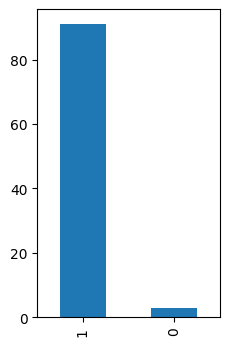

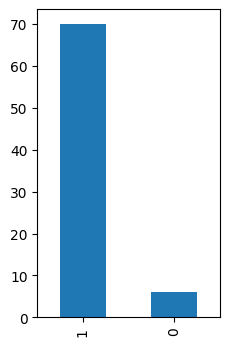

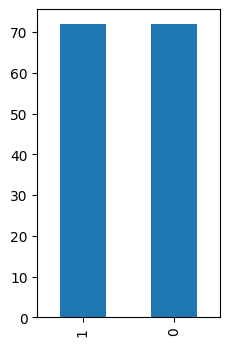

In [9]:
plot.figure(figsize=(8,4))
plot.subplot(1,3,1)
df_titanic["Survived"].loc[df_titanic["Pclass"]==1].loc[df_titanic["Sex"]=='female'].value_counts().plot.bar()
#Survival and death chart for female 1st class passengers. 1 means alive, 0 means dead.
plot.figure(figsize=(8,4))
plot.subplot(1,3,2)
df_titanic["Survived"].loc[df_titanic["Pclass"]==2].loc[df_titanic["Sex"]=='female'].value_counts().plot.bar()
#Survival and death chart for female 2st class passengers. 1 means alive, 0 means dead.
plot.figure(figsize=(8,4))
plot.subplot(1,3,3)
df_titanic["Survived"].loc[df_titanic["Pclass"]==3].loc[df_titanic["Sex"]=='female'].value_counts().plot.bar()
#Survival and death chart for female 2st class passengers. 1 means alive, 0 means dead.

# Q8 Two boxplots that show the key age statistics of female and male passengers who survived and who did not survive.

Text(0.5, 0.98, 'for female passengers')

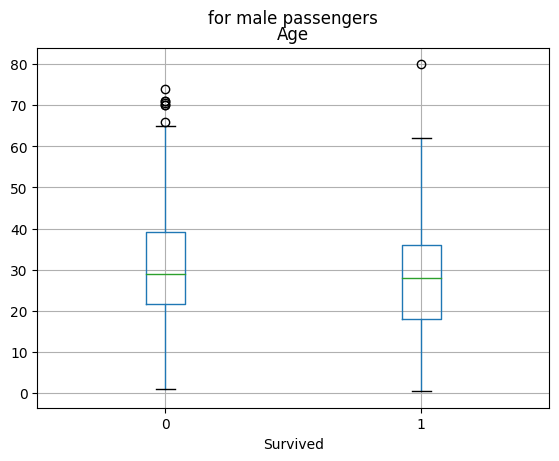

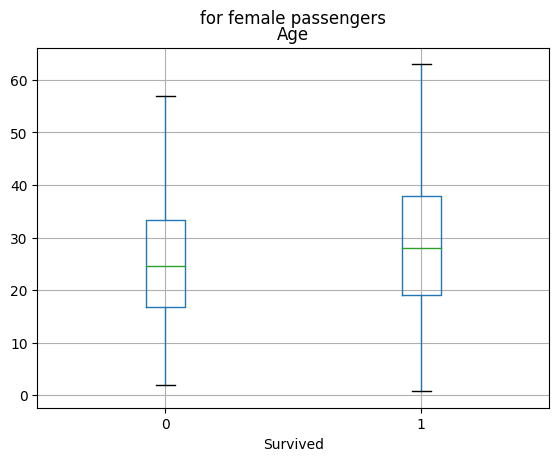

In [10]:
df_titanic[df_titanic['Sex']== "male"].boxplot(column = "Age", by = "Survived")
plot.suptitle("for male passengers")
#Basic age statistics of female survivors and non-survivors, 1 means alive 0 means dead
df_titanic[df_titanic['Sex']== "female"].boxplot(column = "Age", by = "Survived")
plot.suptitle("for female passengers")
#Basic age statistics of male survivors and non-survivors, 1 means alive 0 means dead



# Q9 Create a cross table 

In [11]:
pd.crosstab(df_titanic.Sex,df_titanic.Survived,margins=True)

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


# Q10

In [12]:
a = df_titanic["Survived"].loc[df_titanic["Sex"]=='female'].sum()/df_titanic["Survived"].loc[df_titanic["Sex"]=='female'].value_counts().sum()

b = df_titanic["Survived"].loc[df_titanic["Sex"]=='male'].sum()/df_titanic["Survived"].loc[df_titanic["Sex"]=='male'].value_counts().sum()

if a > b:
  print("Female have a higher survival rater")
elif a == b:
  print("Male have a higher survival rate")

Female have a higher survival rater


### The survival rate of femel is higher, which may be due to the fact that female and children are primarily put on boats.

# Q11 Create a heatmap for the correlation between the attributes of survival, age, sex, fare, and ticket class

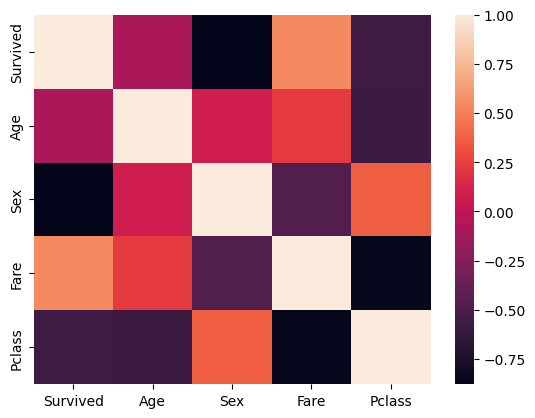

In [13]:
df_titanic["Sex"]=df_titanic.Sex.map({"female":0,"male":1})
df_corr = df_titanic[["Survived","Age", "Sex","Fare","Pclass"]].corr()
sns.heatmap(df_corr.corr());


# Q12 Calculate the “Pearson” standard correlation coefficient

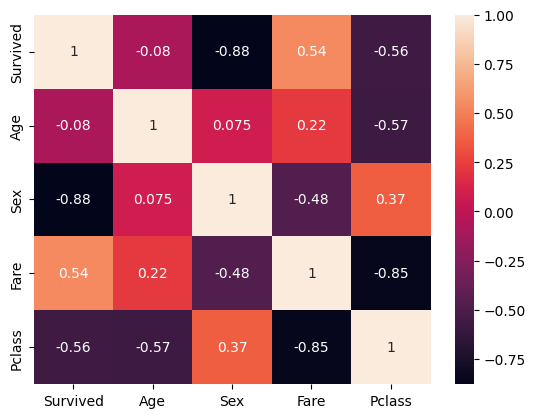

In [14]:
sns.heatmap(df_corr.corr(method="pearson"), annot=True);

### As ticket classes increase, so does the survival rate of those in higher ticket classes. In fact, 3rd class passengers have the highest survival rate.

# Q13 What is the age of the youngest passenger?

In [15]:
df_titanic['Age'].min()

0.42

### The age of the youngest passenger is given as 0.42 in the data we received, that is, it is a 4, 5 month old baby who has not yet turned 1 year old.

# Q14 How much is the average fare?

In [16]:
df_titanic['Fare'].mean()

32.204207968574636

### On average the fare is 32

# Q15  Oldest passenger who survived

In [17]:
max(df_titanic[df_titanic['Survived'] == 1]['Age'])

80.0

### The oldest surviving passenger is 80 years old.

# Q16 Oldest female passenger who survived 

In [18]:
max(df_titanic[(df_titanic['Survived'] == 1)&(df_titanic['Sex'] == 0)]['Age'])

63.0

### The oldest surviving female is 63 years old.

# Q17 Are there any children under the age of 10 traveling without their parents?

In [19]:
df_titanic[(df_titanic['Age'] < 10) & (df_titanic['Parch'] == 0)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
777,778,1,3,"Emanuel, Miss. Virginia Ethel",0,5.0,0,0,364516,12.475,NaN,S


### Yes there is.he is a 5 year old child. Could be stowaway or someone's nephew.

# Q18 Plot the histograms that show the age distribution of the female and male passengers who survived

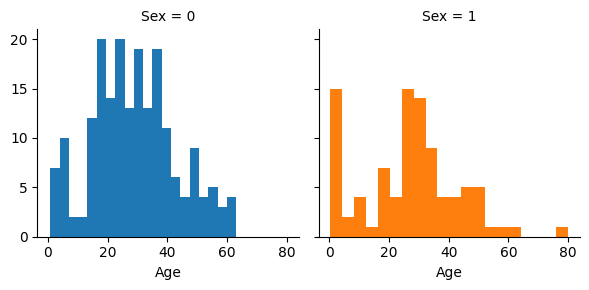

In [20]:
sns.FacetGrid(df_titanic[df_titanic['Survived']==1], col='Sex', hue = "Sex").map(plot.hist, 'Age', bins=20)


### Sex= 0 so the blue graph represents women and higher values so women are more likely to survive

# Q19 Number of siblings of the passenger who has the highest number of siblings

In [21]:
max(df_titanic['SibSp'])

8

### The number of siblings of the passenger with the most siblings is 8 siblings.

# Q20 Plot a scatterplot that shows the age–fare correlation for passengers who survived and who did not survive.

<AxesSubplot: xlabel='Age', ylabel='Fare'>

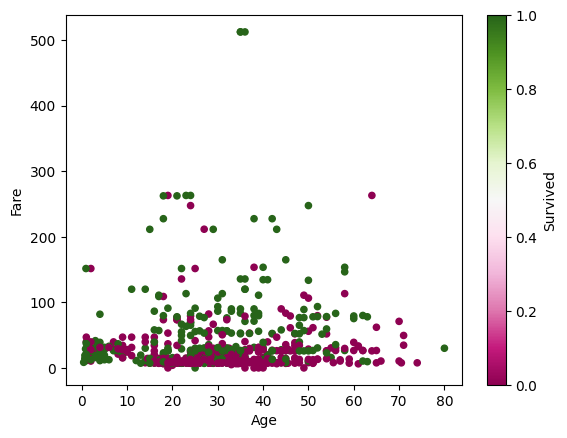

In [23]:
df_titanic.plot.scatter(x='Age',y='Fare',c='Survived',cmap='PiYG')